## The below 2 data set has different format and datatype , here are the process for how to formating data and change data type.

In [1]:
import pandas as pd
import glob
path = r'/Users/balance/Desktop/ARK_10_18' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df1 = pd.concat(li, axis=0, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df1.head(1)

,date,fund,company,ticker,cusip,shares,market value ($),weight (%)
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,"2,447,494","$2,063,310,866.82",9.99%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

## clean up the formating data set make it match with the dataset 2 for further combine or merge purpose

In [6]:
df1_1=df1.rename(columns={'market value ($)':'market_value','weight (%)':'weight'})

In [7]:
df1_1.head(1)

,date,fund,company,ticker,cusip,shares,market_value,weight
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,"2,447,494","$2,063,310,866.82",9.99%


In [8]:
df1_1=df1_1.replace(r'[$%,]','',regex=True)

In [9]:
df1_1.head(1)

,date,fund,company,ticker,cusip,shares,market_value,weight
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,2447494,2063310866.82,9.99


In [11]:
df1_1.dtypes

date            object
fund            object
company         object
ticker          object
cusip           object
shares          object
market_value    object
weight          object
dtype: object

In [12]:
path2 = r'/Users/balance/Desktop/ARK_09_30_21' # use your path
all_files2 = glob.glob(path2 + "/*.csv")
li2 = []
for filename2 in all_files2:
    df2 = pd.read_csv(filename2, index_col=None, header=0)
    li2.append(df2)
df2 = pd.concat(li2, axis=0, ignore_index=True)

In [13]:
df2.head(1)

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,9/30/2021,PRNT,EXONE CO/THE,XONE,302104104,1079022.0,24828296.22,5.38


In [14]:
df2_1=df2.rename(columns={'market value($)':'market_value','weight(%)':'weight'})

In [15]:
df2_1.head(1)

,date,fund,company,ticker,cusip,shares,market_value,weight
0,9/30/2021,PRNT,EXONE CO/THE,XONE,302104104,1079022.0,24828296.22,5.38


In [16]:
df2_1=df2_1.replace(r'[$%,]','',regex=True)

In [17]:
df2_1.head(1)

,date,fund,company,ticker,cusip,shares,market_value,weight
0,9/30/2021,PRNT,EXONE CO/THE,XONE,302104104,1079022.0,24828296.22,5.38


In [20]:
df2_1.dtypes

date             object
fund             object
company          object
ticker           object
cusip            object
shares          float64
market_value    float64
weight          float64
dtype: object

In [18]:
import datacompy

In [19]:
compare=datacompy.Compare(df1_1,df2_1, join_columns='cusip')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        8   395
1       df2        8   422

Column Summary
--------------

Number of columns in common: 8
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: cusip
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 393
Number of rows in df1 but not in df2: 2
Number of rows in df2 but not in df1: 29

Number of rows with some compared columns unequal: 391
Number of rows with all compared columns equal: 2

Column Comparison
-----------------

Number of columns compared with some values unequal: 5
Number of columns compared with all values equal: 3
Total number of values which compare unequal: 1,619

Columns with Unequal Values or Types
------------------------------------

         Column df1 dtype df2 dtype  # Unequal      Max Diff  # Null Diff
3 

## two dataset has different datatype, so need to change datatype 

In [21]:
df1_1.dtypes,  df2_1.dtypes

(date            object
 fund            object
 company         object
 ticker          object
 cusip           object
 shares          object
 market_value    object
 weight          object
 dtype: object,
 date             object
 fund             object
 company          object
 ticker           object
 cusip            object
 shares          float64
 market_value    float64
 weight          float64
 dtype: object)

In [23]:
df1_1['market_value']=df1_1['market_value'].astype(float)

In [24]:
df1_1['shares']=df1_1['shares'].astype(float)
df1_1['weight']=df1_1['weight'].astype(float)

In [25]:
df1_1.dtypes,  df2_1.dtypes

(date             object
 fund             object
 company          object
 ticker           object
 cusip            object
 shares          float64
 market_value    float64
 weight          float64
 dtype: object,
 date             object
 fund             object
 company          object
 ticker           object
 cusip            object
 shares          float64
 market_value    float64
 weight          float64
 dtype: object)

In [26]:
merge1=pd.merge(df1_1,df2_1,on=["fund","cusip"],how="inner")

In [28]:
merge1.head(1)

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,2447494.0,2.063311e+09,9.99,9/30/2021,TESLA INC,TSLA,2548748.0,1.991362e+09,10.34


In [29]:
merge1.isnull().sum()

date_x              0
fund              192
company_x         192
ticker_x          202
cusip             192
shares_x          192
market_value_x    192
weight_x          192
date_y            128
company_y         192
ticker_y          202
shares_y          192
market_value_y    192
weight_y          192
dtype: int64

In [30]:
for col in merge1.columns:
    pct_missing = np.mean(merge1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 0%
fund - 33%
company_x - 33%
ticker_x - 35%
cusip - 33%
shares_x - 33%
market_value_x - 33%
weight_x - 33%
date_y - 22%
company_y - 33%
ticker_y - 35%
shares_y - 33%
market_value_y - 33%
weight_y - 33%


In [31]:
merge1.shape

(577, 14)

In [32]:
merge1.dropna(axis=0, how='all', inplace=True)

In [33]:
merge1.shape

(577, 14)

In [34]:
merge1_6=merge1.copy()

## Calculate the shares holding precentage change between different date/ 

### can't just calculate the shares amount change/ because different stock has different share price so simply calculate shares change doesnt reflacte the actual change/
### so calculate the holding precentage change is more acculate

In [68]:
### so calculate the share change is "recent share" - "before share" and apply to (pct_change)
merge1_6[['shares_y','shares_x']] = merge1_6[['shares_y','shares_x']].pct_change(axis='columns',periods = 1)

In [41]:
merge1_6.sort_values('shares_x',ascending=False).head(10)

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y
274,10/18/2021,ARKF,TOAST INC-CLASS A,TOST,888787108,3.827430,4.006480e+06,0.12,9/30/2021,TOAST INC-CLASS A,TOST,NaN,7.350017e+05,0.02
575,10/18/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,2.746642,7.025620e+06,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,1.875178e+06,0.04
529,10/18/2021,ARKQ,INTUITIVE SURGICAL INC,ISRG,46120E602,1.962527,2.453034e+07,0.96,9/30/2021,INTUITIVE SURGICAL INC,ISRG,NaN,2.478692e+07,0.98
381,10/18/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,1.759928,9.447604e+06,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,3.423135e+06,0.05
421,10/18/2021,IZRL,INMODE LTD,INMD,M5425M103,0.983068,5.712096e+06,2.16,9/30/2021,INMODE LTD,INMD,NaN,5.512107e+06,2.11
43,10/18/2021,ARKK,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,0.889175,2.710874e+07,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,1.434951e+07,0.07
26,10/18/2021,ARKK,GINKGO BIOWORKS HOLDINGS INC,DNA,37611X100,0.763958,2.390574e+08,1.16,9/30/2021,GINKGO BIOWORKS HOLDINGS INC,DNA,NaN,1.388232e+08,0.72
346,10/18/2021,ARKG,GINKGO BIOWORKS HOLDINGS INC,DNA,37611X100,0.678410,1.849887e+08,2.61,9/30/2021,GINKGO BIOWORKS HOLDINGS INC,DNA,NaN,1.129003e+08,1.60
365,10/18/2021,ARKG,SOMALOGIC INC,SLGC,83444K105,0.401937,7.820685e+07,1.11,9/30/2021,SOMALOGIC INC,SLGC,NaN,5.660311e+07,0.80
284,10/18/2021,PRNT,DESKTOP METAL INC-A,DM,25058X105,0.308680,1.769289e+07,3.80,9/30/2021,DESKTOP METAL INC-A,DM,NaN,1.408622e+07,3.05


In [37]:
merge1_6.sort_values('weight_x',ascending=False)[:10]

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y
497,10/18/2021,ARKQ,TESLA INC,TSLA,88160R101,-0.094075,2.889839e+08,11.33,9/30/2021,TESLA INC,TSLA,NaN,2.956391e+08,11.74
237,10/18/2021,ARKF,SQUARE INC - A,SQ,852234103,-0.031208,3.404530e+08,10.09,9/30/2021,SQUARE INC - A,SQ,NaN,3.331292e+08,10.36
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,-0.039727,2.063311e+09,9.99,9/30/2021,TESLA INC,TSLA,NaN,1.991362e+09,10.34
534,10/18/2021,ARKW,TESLA INC,TSLA,88160R101,-0.057691,5.307262e+08,9.98,9/30/2021,TESLA INC,TSLA,NaN,5.219846e+08,10.55
385,10/18/2021,ARKX,TRIMBLE INC,TRMB,896239100,-0.012686,5.094025e+07,9.39,9/30/2021,TRIMBLE INC,TRMB,NaN,5.121816e+07,9.39
332,10/18/2021,ARKG,TELADOC HEALTH INC,TDOC,87918A105,0.057273,5.575906e+08,7.88,9/30/2021,TELADOC HEALTH INC,TDOC,NaN,4.904609e+08,6.95
386,10/18/2021,ARKX,THE 3D PRINTING ETF,PRNT,00214Q500,0.026728,4.217421e+07,7.77,9/30/2021,THE 3D PRINTING ETF,PRNT,NaN,4.035211e+07,7.40
535,10/18/2021,ARKW,GRAYSCALE BITCOIN TRUST BTC,GBTC,389637109,-0.012500,3.790767e+08,7.13,9/30/2021,GRAYSCALE BITCOIN TRUST BTC,GBTC,NaN,2.600733e+08,5.25
498,10/18/2021,ARKQ,TRIMBLE INC,TRMB,896239100,-0.012520,1.796906e+08,7.04,9/30/2021,TRIMBLE INC,TRMB,NaN,1.806403e+08,7.18
499,10/18/2021,ARKQ,KRATOS DEFENSE & SECURITY,KTOS,50077B207,-0.012520,1.784330e+08,6.99,9/30/2021,KRATOS DEFENSE & SECURITY,KTOS,NaN,1.819814e+08,7.23


In [38]:
merge1_6.sort_values('shares_x',ascending=False)[:15]

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y
274,10/18/2021,ARKF,TOAST INC-CLASS A,TOST,888787108,3.827430,4.006480e+06,0.12,9/30/2021,TOAST INC-CLASS A,TOST,NaN,7.350017e+05,0.02
575,10/18/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,2.746642,7.025620e+06,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,1.875178e+06,0.04
529,10/18/2021,ARKQ,INTUITIVE SURGICAL INC,ISRG,46120E602,1.962527,2.453034e+07,0.96,9/30/2021,INTUITIVE SURGICAL INC,ISRG,NaN,2.478692e+07,0.98
381,10/18/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,1.759928,9.447604e+06,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,3.423135e+06,0.05
421,10/18/2021,IZRL,INMODE LTD,INMD,M5425M103,0.983068,5.712096e+06,2.16,9/30/2021,INMODE LTD,INMD,NaN,5.512107e+06,2.11
43,10/18/2021,ARKK,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,0.889175,2.710874e+07,0.13,9/30/2021,DREYFUS GOVT CASH MAN INS,NaN,NaN,1.434951e+07,0.07
26,10/18/2021,ARKK,GINKGO BIOWORKS HOLDINGS INC,DNA,37611X100,0.763958,2.390574e+08,1.16,9/30/2021,GINKGO BIOWORKS HOLDINGS INC,DNA,NaN,1.388232e+08,0.72
346,10/18/2021,ARKG,GINKGO BIOWORKS HOLDINGS INC,DNA,37611X100,0.678410,1.849887e+08,2.61,9/30/2021,GINKGO BIOWORKS HOLDINGS INC,DNA,NaN,1.129003e+08,1.60
365,10/18/2021,ARKG,SOMALOGIC INC,SLGC,83444K105,0.401937,7.820685e+07,1.11,9/30/2021,SOMALOGIC INC,SLGC,NaN,5.660311e+07,0.80
284,10/18/2021,PRNT,DESKTOP METAL INC-A,DM,25058X105,0.308680,1.769289e+07,3.80,9/30/2021,DESKTOP METAL INC-A,DM,NaN,1.408622e+07,3.05


In [45]:
merge1_7=merge1_6.query('weight_x > 2').sort_values(by='weight_x',axis=0,ascending=False,inplace=False)

In [46]:
merge1_7.query('shares_x > 0').sort_values(by='shares_x',axis=0,ascending=False,inplace=False)

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y
421,10/18/2021,IZRL,INMODE LTD,INMD,M5425M103,0.983068,5.712096e+06,2.16,9/30/2021,INMODE LTD,INMD,NaN,5.512107e+06,2.11
346,10/18/2021,ARKG,GINKGO BIOWORKS HOLDINGS INC,DNA,37611X100,0.678410,1.849887e+08,2.61,9/30/2021,GINKGO BIOWORKS HOLDINGS INC,DNA,NaN,1.129003e+08,1.60
284,10/18/2021,PRNT,DESKTOP METAL INC-A,DM,25058X105,0.308680,1.769289e+07,3.80,9/30/2021,DESKTOP METAL INC-A,DM,NaN,1.408622e+07,3.05
279,10/18/2021,PRNT,XOMETRY INC-A,XMTR,98423F109,0.255596,1.811562e+07,3.89,9/30/2021,XOMETRY INC-A,XMTR,NaN,1.339665e+07,2.90
14,10/18/2021,ARKK,CRISPR THERAPEUTICS AG,CRSP,H17182108,0.229945,5.805742e+08,2.81,9/30/2021,CRISPR THERAPEUTICS AG,CRSP,NaN,5.362678e+08,2.78
342,10/18/2021,ARKG,CRISPR THERAPEUTICS AG,CRSP,H17182108,0.195303,2.106594e+08,2.98,9/30/2021,CRISPR THERAPEUTICS AG,CRSP,NaN,2.002224e+08,2.84
515,10/18/2021,ARKQ,BLADE AIR MOBILITY INC,BLDE,092667104,0.186476,5.285049e+07,2.07,9/30/2021,BLADE AIR MOBILITY INC,BLDE,NaN,4.476117e+07,1.78
280,10/18/2021,PRNT,PROTO LABS INC,PRLB,743713109,0.179013,1.799685e+07,3.86,9/30/2021,PROTO LABS INC,PRLB,NaN,1.466083e+07,3.18
17,10/18/2021,ARKK,BEAM THERAPEUTICS INC,BEAM,07373V105,0.166267,5.110419e+08,2.47,9/30/2021,BEAM THERAPEUTICS INC,BEAM,NaN,4.104290e+08,2.13
395,10/18/2021,ARKX,UIPATH INC - CLASS A,PATH,90364P105,0.154199,1.790007e+07,3.30,9/30/2021,UIPATH INC - CLASS A,PATH,NaN,1.613222e+07,2.96


## INMD DNA DM XMTR CRSP BLDE PRLB ARE THE STOCK HAS MOST SHARES BUY PRECENTAGE AND ALSO WEIGHT MORE THAN "2"

In [66]:
merge1_7['precentage change']=merge1_7['shares_x']

In [69]:
merge1_7.head(5)

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y,precentage change
497,10/18/2021,ARKQ,TESLA INC,TSLA,88160R101,-0.094075,2.889839e+08,11.33,9/30/2021,TESLA INC,TSLA,NaN,2.956391e+08,11.74,-0.094075
237,10/18/2021,ARKF,SQUARE INC - A,SQ,852234103,-0.031208,3.404530e+08,10.09,9/30/2021,SQUARE INC - A,SQ,NaN,3.331292e+08,10.36,-0.031208
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,-0.039727,2.063311e+09,9.99,9/30/2021,TESLA INC,TSLA,NaN,1.991362e+09,10.34,-0.039727
534,10/18/2021,ARKW,TESLA INC,TSLA,88160R101,-0.057691,5.307262e+08,9.98,9/30/2021,TESLA INC,TSLA,NaN,5.219846e+08,10.55,-0.057691
385,10/18/2021,ARKX,TRIMBLE INC,TRMB,896239100,-0.012686,5.094025e+07,9.39,9/30/2021,TRIMBLE INC,TRMB,NaN,5.121816e+07,9.39,-0.012686


In [44]:
merge1_6.shares_y.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: shares_y, dtype: float64

## Visulaize result to verify the calculation

In [47]:
combined=df1_1.append([df2_1])

<AxesSubplot:xlabel='ticker', ylabel='shares'>

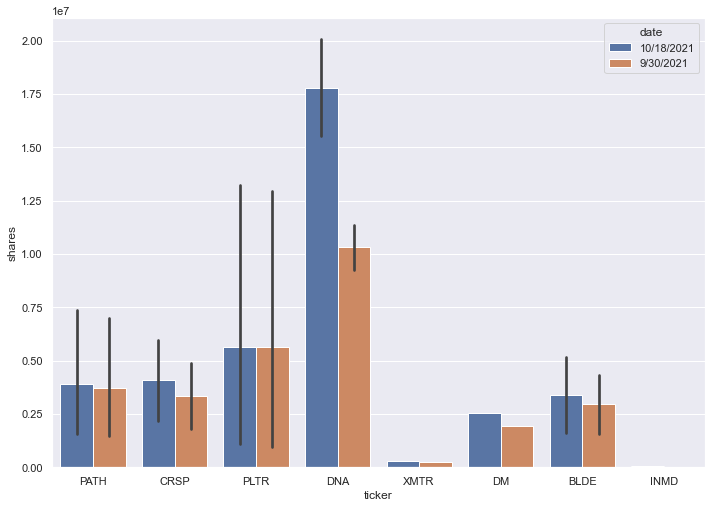

In [72]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['INMD','DNA','PATH','DM','CRSP','XMTR','BLDE','PLTR'])])

### LOOKS LIKE THE CALCULATION AND SORTING ARE RIGHT 

## vizulaized trend of the stock i hold 

<AxesSubplot:xlabel='ticker', ylabel='shares'>

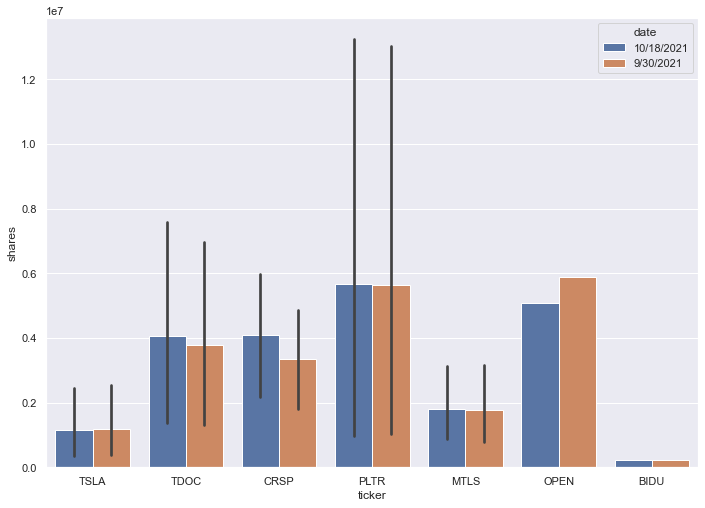

In [49]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['TSLA','MTLS','PLTR','BIDU','TDOC','CRSP','OPEN'])])

In [65]:
combined.query('ticker=="PATH"')

,date,fund,company,ticker,cusip,shares,market_value,weight
12,10/18/2021,ARKK,UIPATH INC - CLASS A,PATH,90364P105,12557588.0,6.277538e+08,3.04
57,10/18/2021,ARKF,UIPATH INC - CLASS A,PATH,90364P105,1854917.0,9.272730e+07,2.75
164,10/18/2021,ARKG,UIPATH INC - CLASS A,PATH,90364P105,2888350.0,1.443886e+08,2.04
207,10/18/2021,ARKX,UIPATH INC - CLASS A,PATH,90364P105,358073.0,1.790007e+07,3.30
316,10/18/2021,ARKQ,UIPATH INC - CLASS A,PATH,90364P105,3253903.0,1.626626e+08,6.38
367,10/18/2021,ARKW,UIPATH INC - CLASS A,PATH,90364P105,2459662.0,1.229585e+08,2.31
150,9/30/2021,ARKK,UIPATH INC - CLASS A,PATH,90364P105,11785014.0,6.128207e+08,3.18
206,9/30/2021,ARKW,UIPATH INC - CLASS A,PATH,90364P105,2490802.0,1.295217e+08,2.62
257,9/30/2021,ARKG,UIPATH INC - CLASS A,PATH,90364P105,2923519.0,1.520230e+08,2.15
301,9/30/2021,ARKQ,UIPATH INC - CLASS A,PATH,90364P105,3145617.0,1.635721e+08,6.50
